In [1]:
import maboss
import matplotlib.pyplot as plt

# Analysis of the effect of scheduled treatments on a Cell fate Boolean model

In this Jupyter notebook, we'll look at the properties of the model by Calzone et al. and study the effect of a scheduled TNF treatment on the possible cell fates.



## Initializing the simulation

We start by initializing a simulation with the BND and CFG files of the model.

In [12]:
bnd_file = "cellfate.bnd"
cfg_WT = "cellfate.cfg"

In [13]:
param = {'max_time': 105, 'time_tick': 1, 'sample_count': 100000}
outputs = ['NonACD', 'Apoptosis', 'Survival']

In [14]:
sim = maboss.load(bnd_file, cfg_WT)

## Here, no TNF treatment

We start by inactivating the TNF input node, to simulate the effect of the absence of treatment

In [15]:
sim.param.update(param)
sim.network.set_istate('TNF', [1, 0])
sim.network.set_output(outputs)

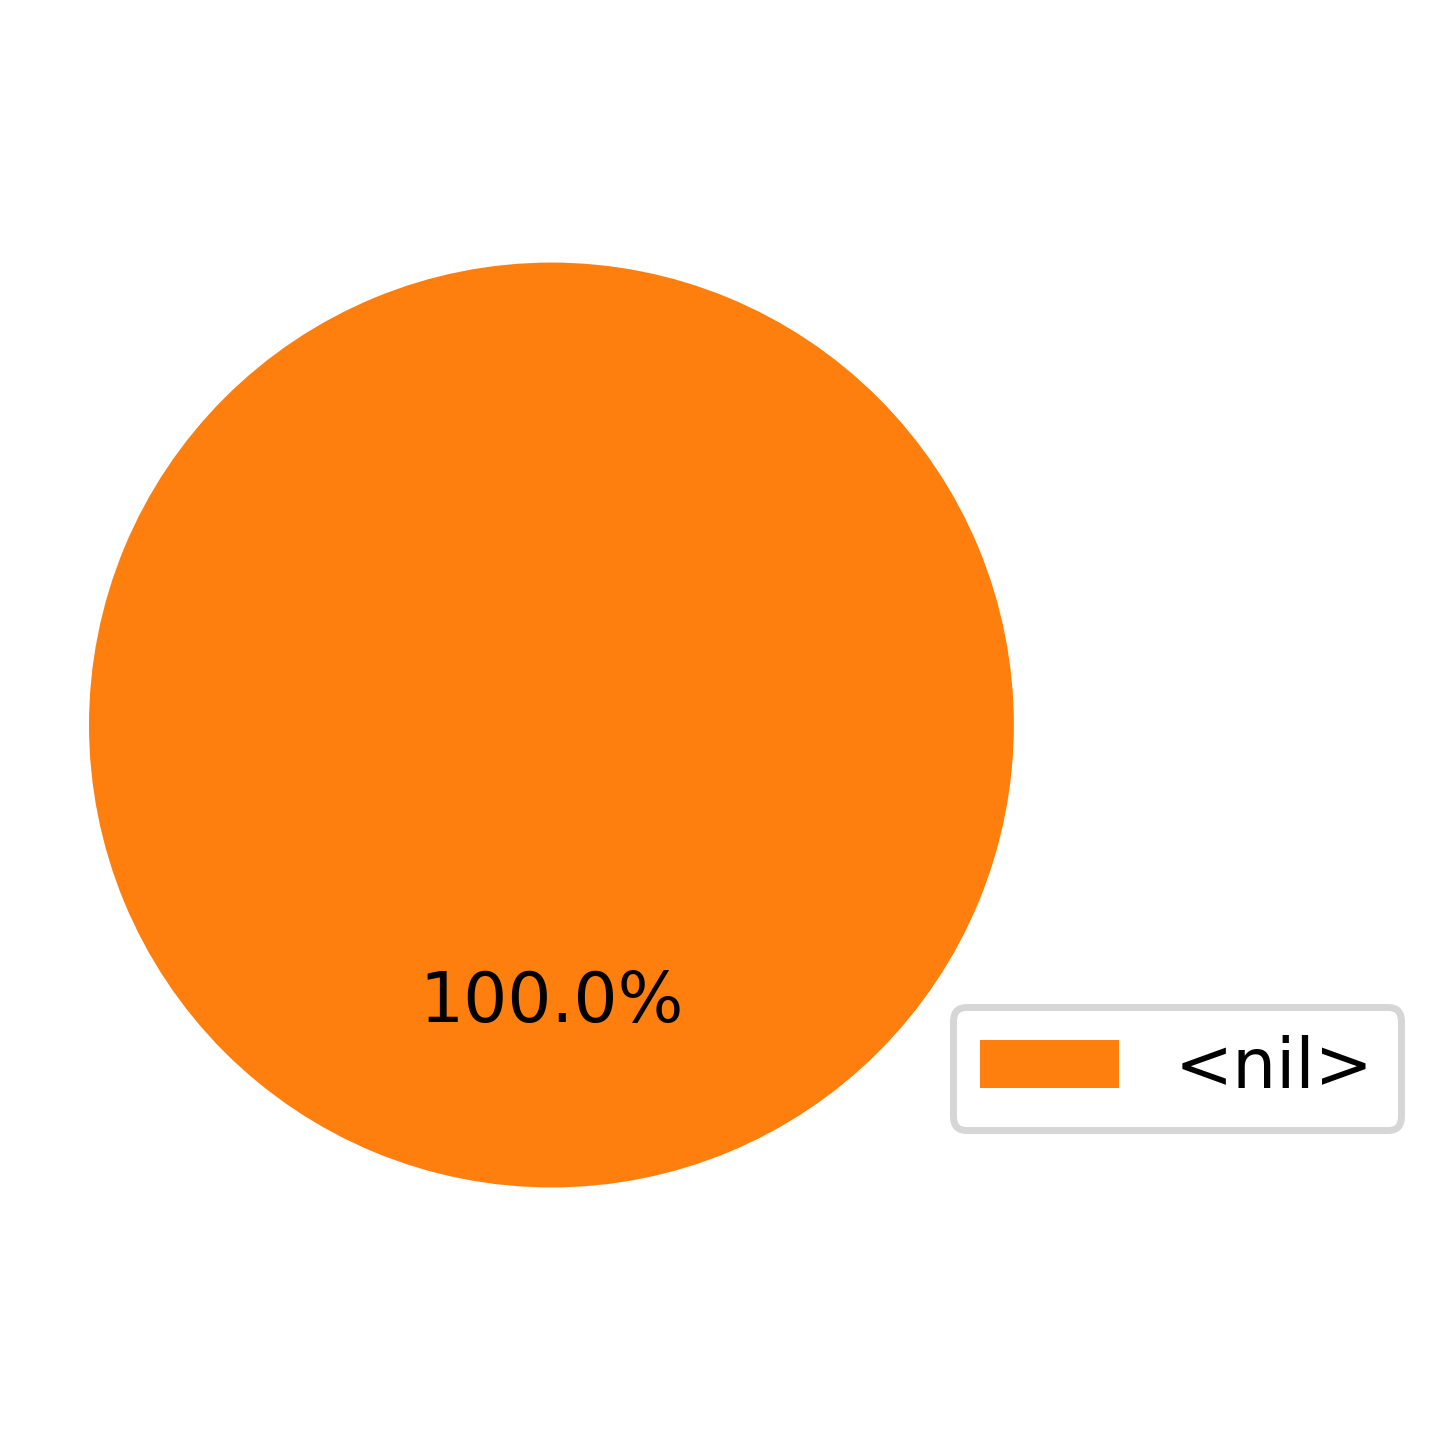

In [16]:
res = sim.run()
fig = plt.figure(figsize=(3,3), dpi=500, tight_layout=True)
fig.subplots(1)
res.plot_piechart(axes=fig.axes[0])

We observe that in the lack of treatment, the cells will remain in the \<nil\> state, which corresponds to homeostasis. 

## Same one with TNF treatment

This time we activate the TNF node to simulate a treatment with TNF.

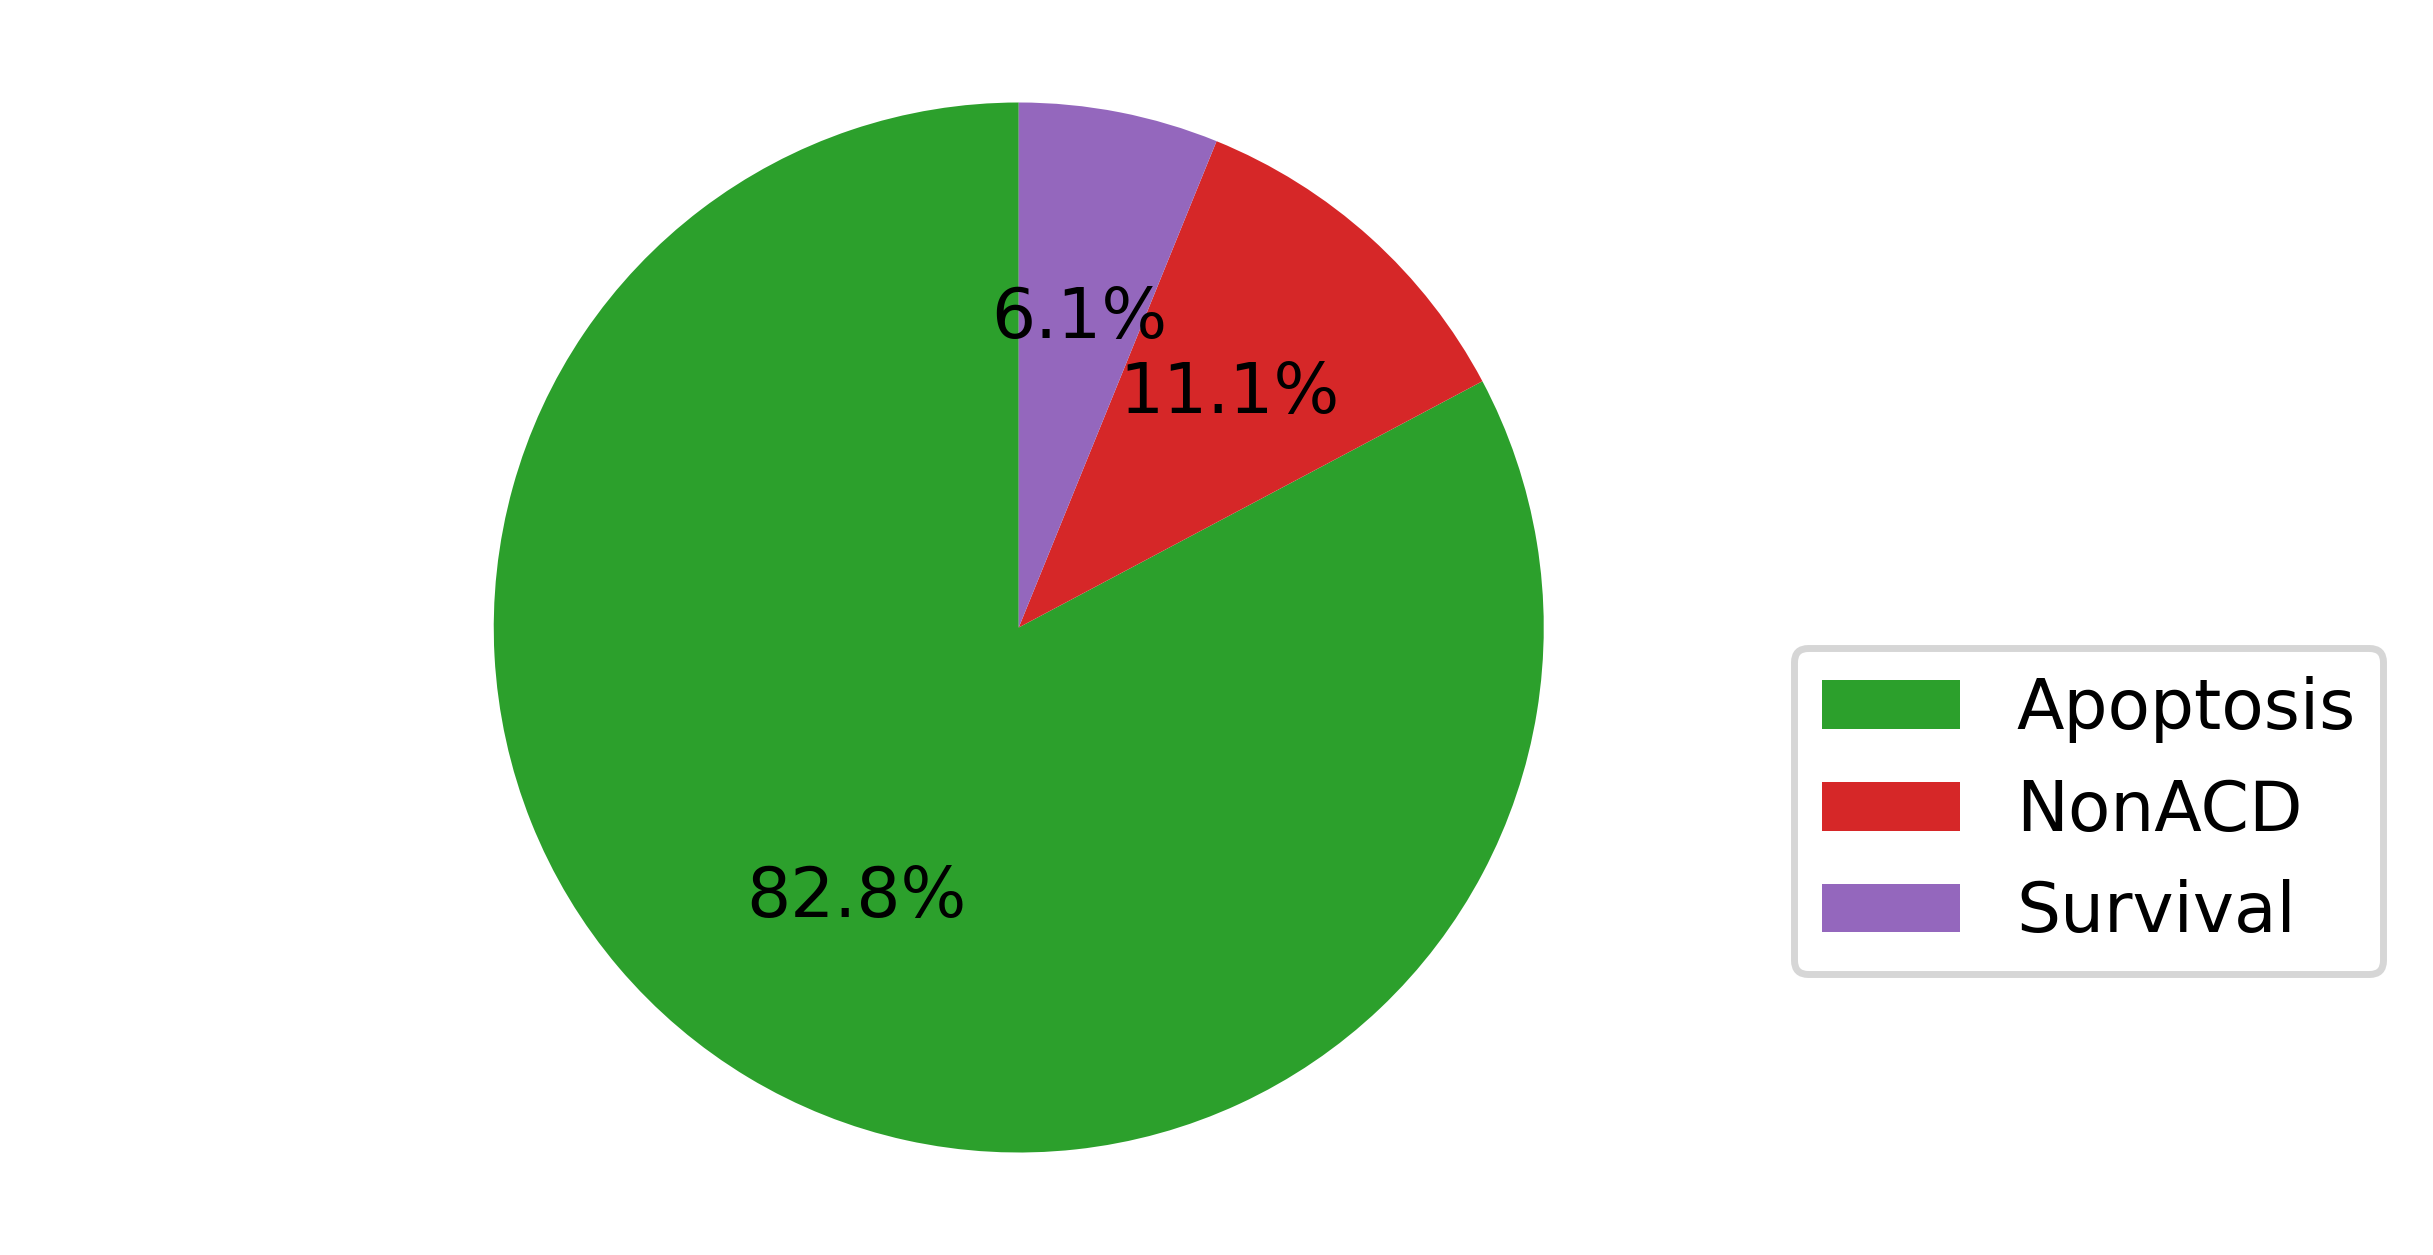

In [17]:
sim_tnf = sim.copy()
sim_tnf.network.set_istate('TNF', [0, 1])
res_tnf = sim_tnf.run()
fig = plt.figure(figsize=(5,3), dpi=500)
fig.subplots(1)
res_tnf.plot_piechart(axes=fig.axes[0])

After the TNF treatment, we observe that the majority of the population undergo apoptosis (~83%) or necrosis (Non Apoptotic Cell Death, ~11%), while minority survives the treatment (~6%).

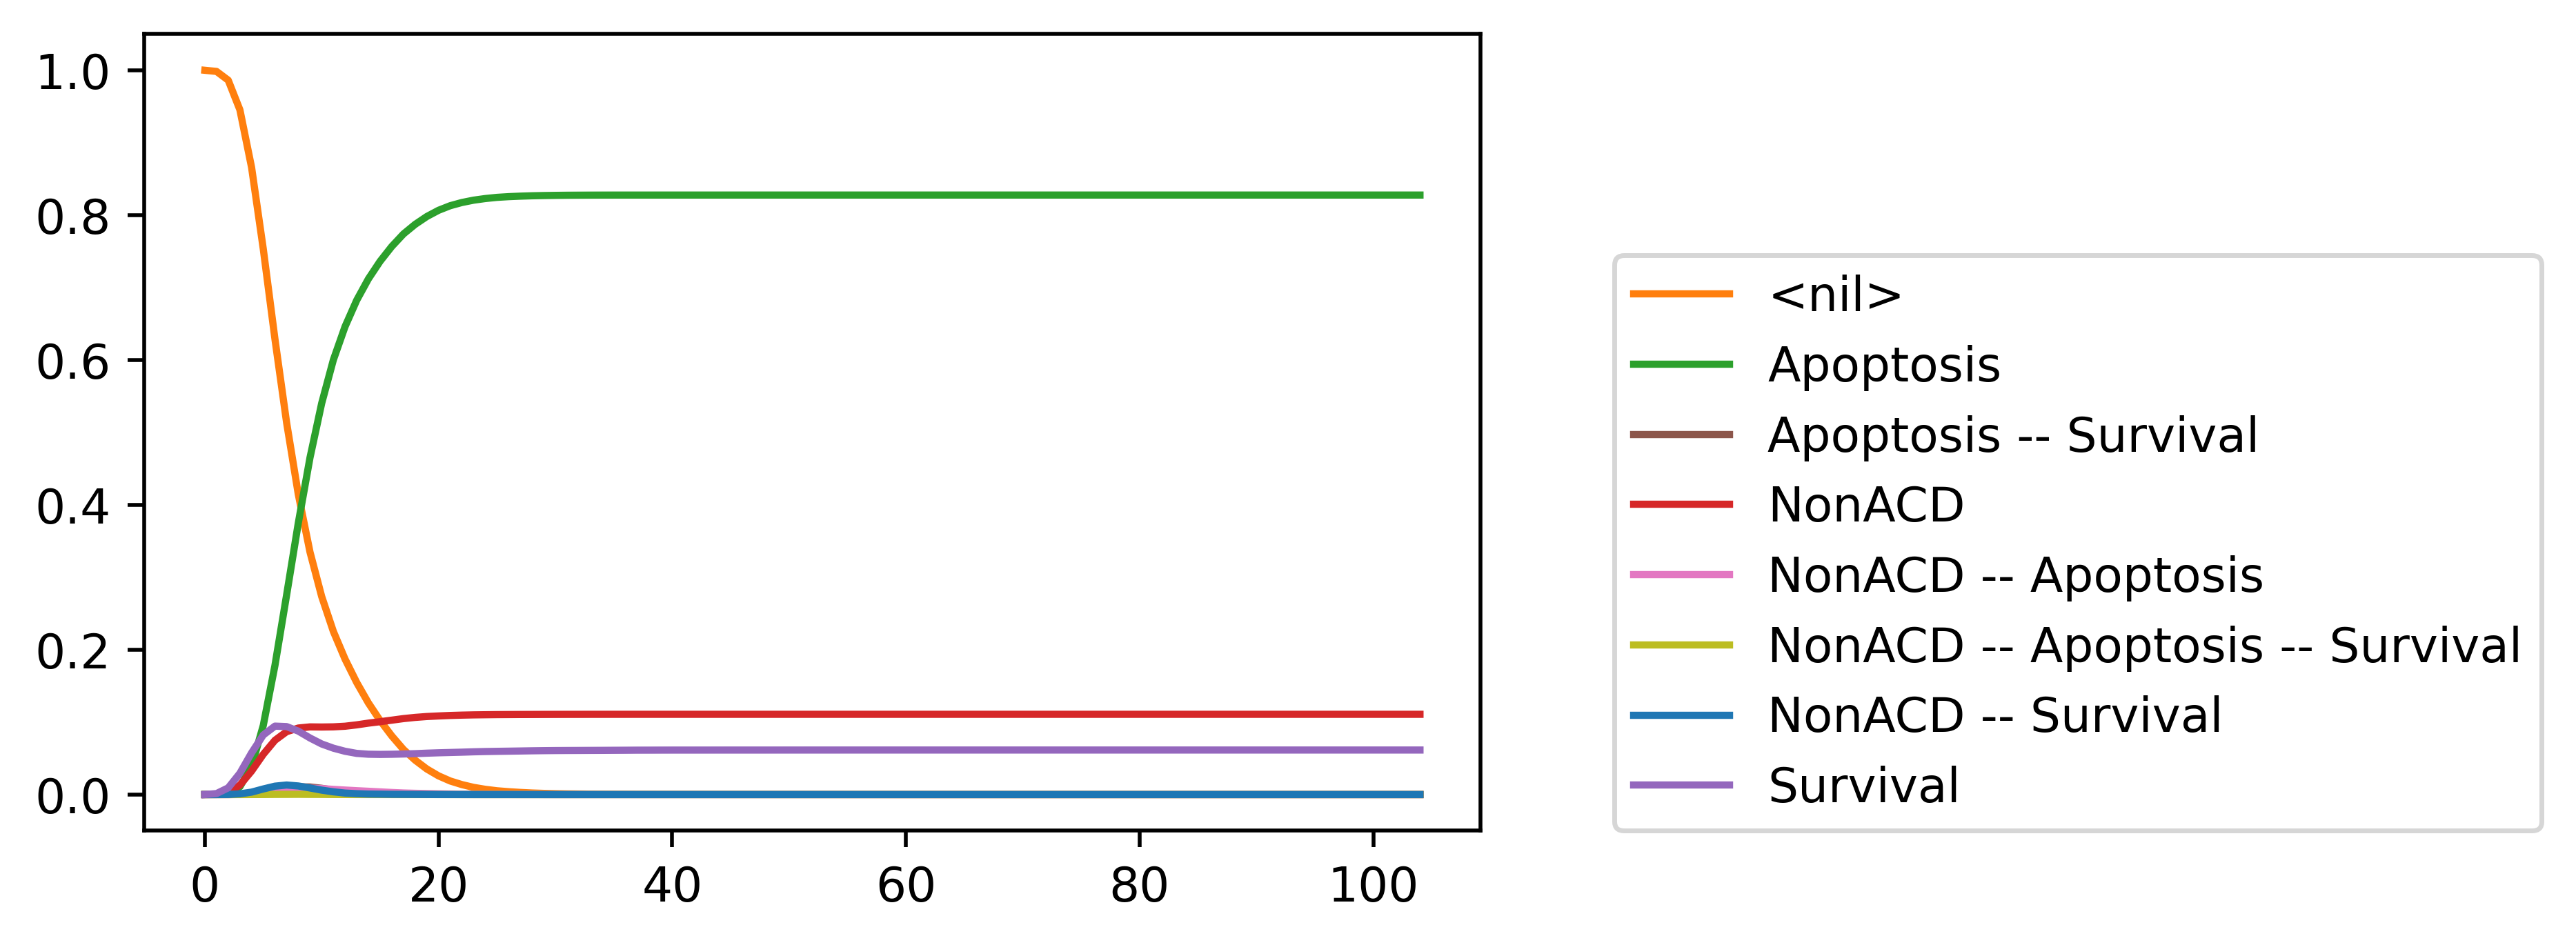

In [18]:
fig = plt.figure(figsize=(5,3), dpi=500)
fig.subplots(1)
res_tnf.plot_trajectory(prob_cutoff=0, axes=fig.axes[0])

Looking at the trajectories, we see that the model reaches a steady state around t=30.

## Simulating scheduled TNF treatments

Here we want to simulate the effect of successive TNF treatments, to see if those can improve the response. 

To achieve this, we use the node scheduling functionality of MaBoSS.

In [23]:
sim_tnf_schedule = sim_tnf.copy()
sim_tnf_schedule.network['TNF'].set_schedule({30: 0, 60: 1, 90: 0})

In [24]:
res_tnf_schedule = sim_tnf_schedule.run()

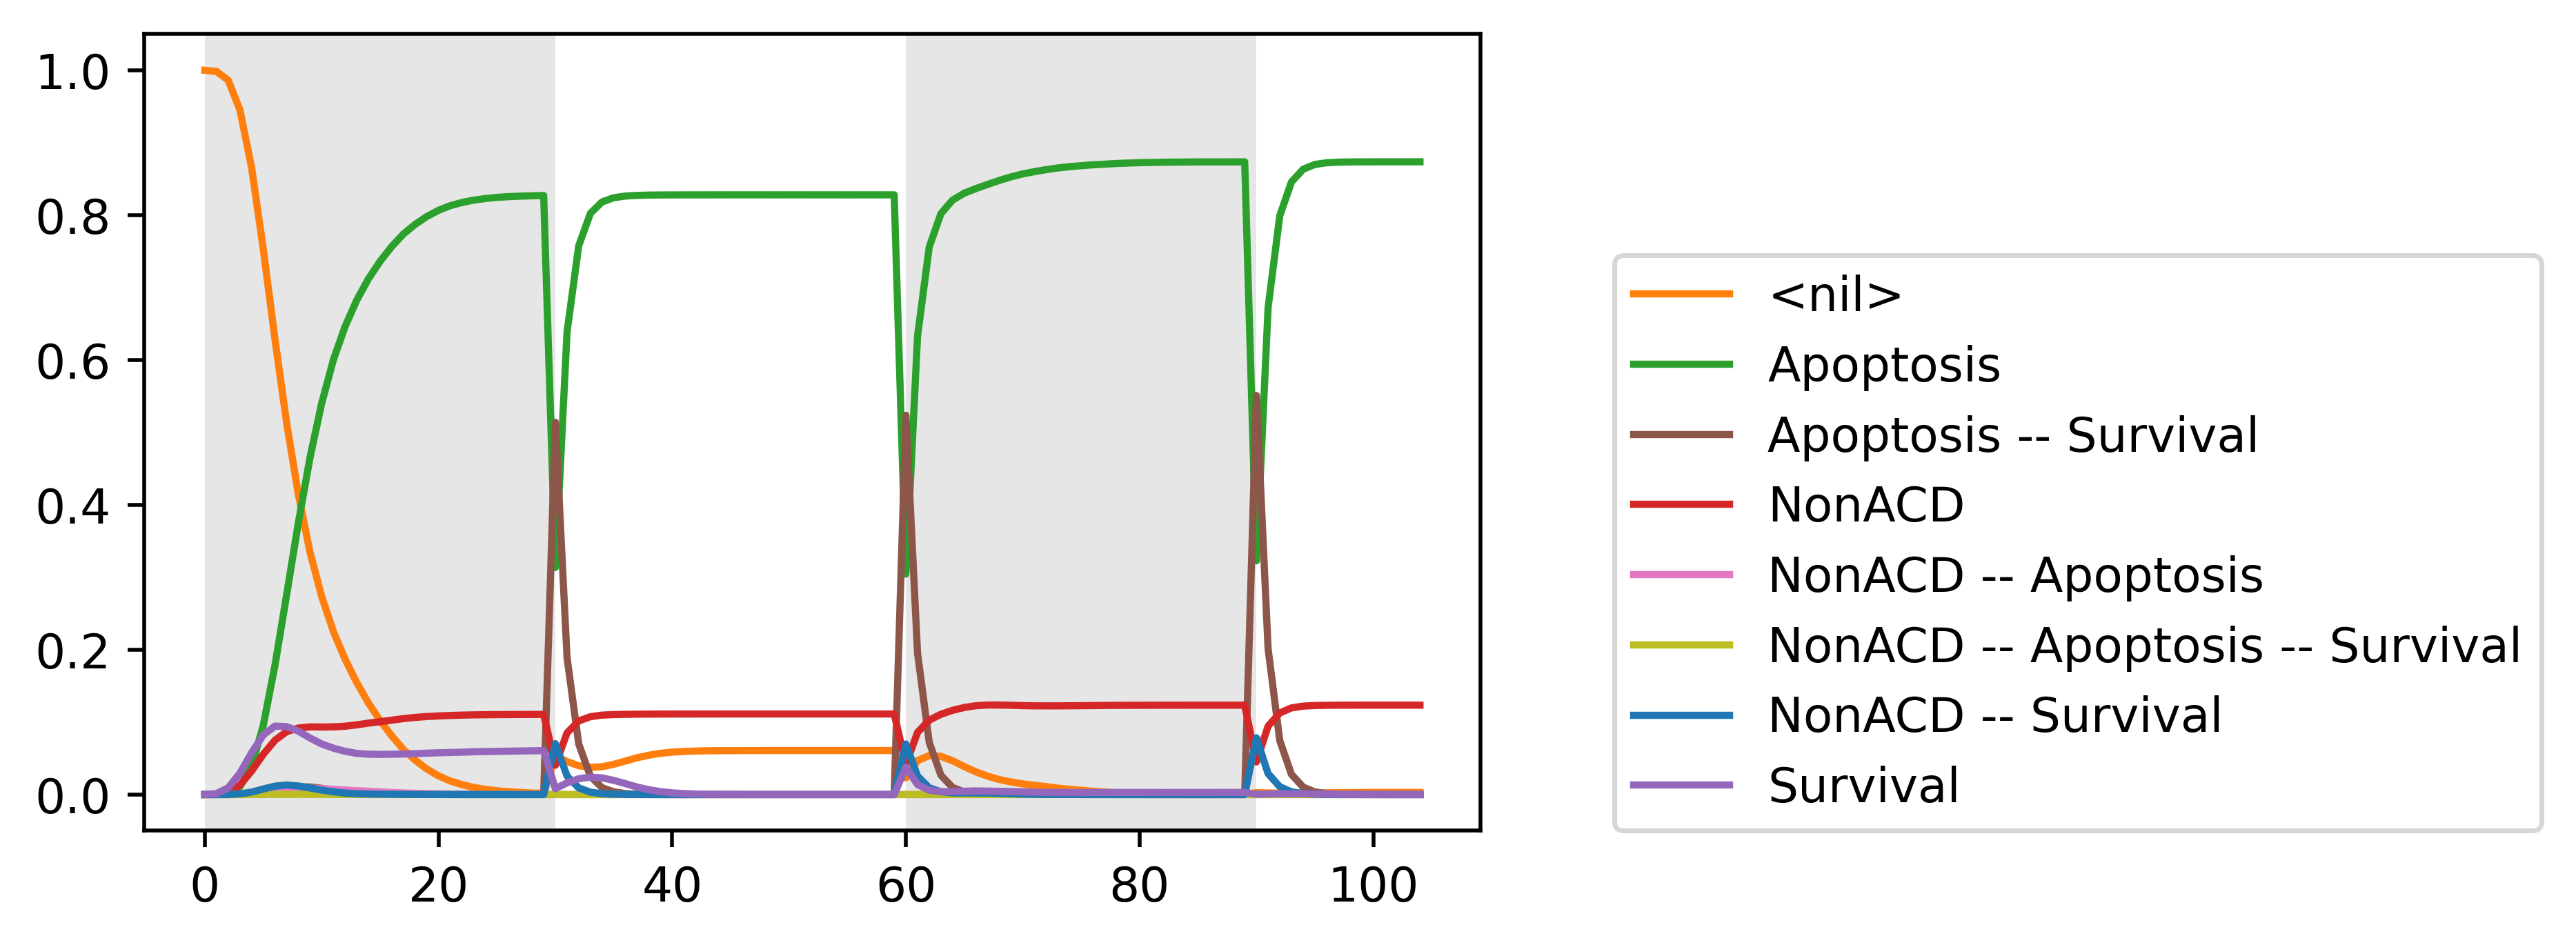

In [27]:
fig = plt.figure(figsize=(5,3), dpi=500)
fig.subplots(1)
res_tnf_schedule.plot_trajectory(prob_cutoff=0, axes=fig.axes[0])
fig.axes[0].axvspan(0., 30, facecolor='0.9')
fig.axes[0].axvspan(60, 90, facecolor='0.9')

In this figure, we highlight in grey the TNF treatments. 

We observe that after the first treatment, the cells which were surviving go back to homeostasis and become succet